<a href="https://colab.research.google.com/github/Priyadharshiniyuvaraj/age_gender_detection/blob/main/age_gender_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Priyadharshiniyuvaraj/age_gender_detection.git
%cd age_gender_detection

Cloning into 'age_gender_detection'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 42 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (42/42), 2.99 MiB | 8.28 MiB/s, done.
Resolving deltas: 100% (7/7), done.
/content/age_gender_detection/age_gender_detection


In [18]:
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow

def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

faceProto = "/content/age_gender_detection/modelNweight/opencv_face_detector.pbtxt"
faceModel = "/content/age_gender_detection/modelNweight/opencv_face_detector_uint8.pb"

ageProto = "/content/age_gender_detection/modelNweight/age_deploy.prototxt"
ageModel = "/content/age_gender_detection/modelNweight/age_net.caffemodel"

genderProto = "/content/age_gender_detection/modelNweight/gender_deploy.prototxt"
genderModel = "/content/age_gender_detection/modelNweight/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]

        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-20), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace

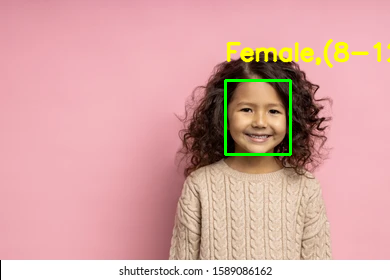

In [19]:
input = cv.imread("/content/age_gender_detection/age_gender_detection/imagef2.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

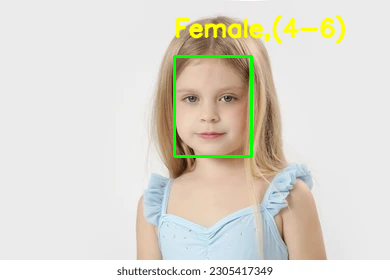

In [17]:
input = cv.imread("/content/age_gender_detection/age_gender_detection/imagef1.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

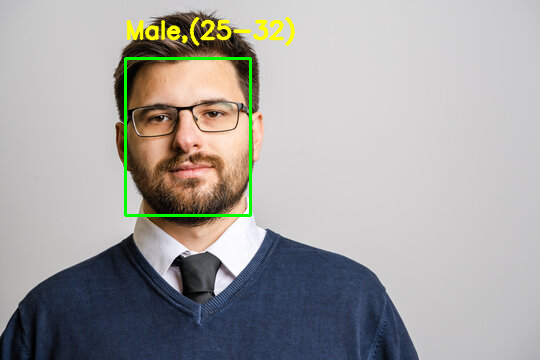

In [ ]:
input = cv.imread("/content/age_gender_detection/age_gender_detection/image.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

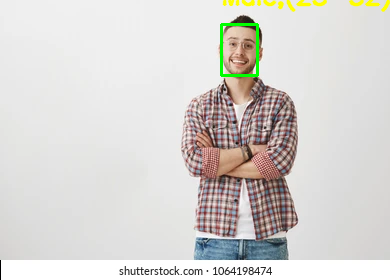

In [8]:
input = cv.imread("/content/age_gender_detection/age_gender_detection/image1.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

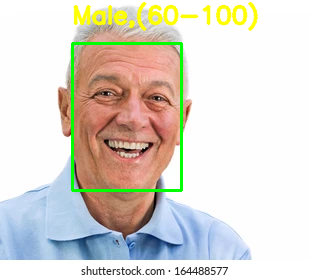

In [11]:
input = cv.imread("/content/age_gender_detection/age_gender_detection/image2.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

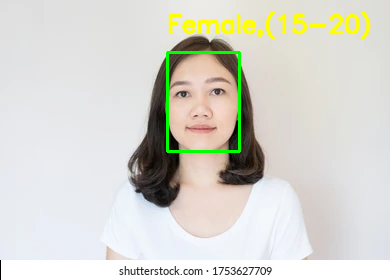

In [12]:
input = cv.imread("/content/age_gender_detection/age_gender_detection/imagef.jpg")
output = age_gender_detector(input)
cv2_imshow(output)